## Approach
1. **Modify the conv1 parameter to take a single channel rather than three**

    ```python
    resnet18.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    ```

2. **Freeze parameters of layers 1-3 ["the first few layers were frozen, and only the last layers were trained"](https://www.sciencedirect.com/science/article/pii/S0169743922000454?via%3Dihub#fig6) (leave fourth convolution trainable)**

    ```python
    freeze_layers = ['layer1', 'layer2', 'layer3']

    for name, param in resnet18.named_parameters():
        if any(name.startswith(layer) for layer in freeze_layers):
            param.requires_grad = False
        else:
            param.requires_grad = True
    ```

3. **Modify the fully connected layer to reflect the image below (code is an estimate)**

    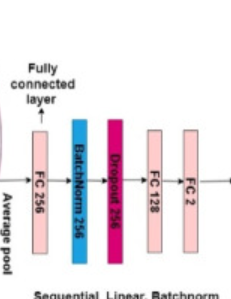

```python
    resnet18.fc = torch.nn.Sequential(
    torch.nn.Linear(in_features=512, out_features=256, bias=True),
    torch.nn.BatchNorm1d(num_features=256),
    torch.nn.ReLU(inplace=True), # Not sure we need
    torch.nn.Dropout(p=0.5), #what to set p?? Authors do not specify, probably 50%
    torch.nn.Linear(in_features=256, out_features=128, bias=True),
    # maybe add activation?
    torch.nn.Linear(in_features=128, out_features=num_classes, bias=True)
    )
```

4. **Train model with our data using 256x256 images**


In [1]:
import torch
import torch.nn as nn
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets
# import torch.optim as optim
# from torch.utils.data import DataLoader
import torchvision.models as models

In [2]:

resnet18 = models.resnet18(pretrained=True)

/home/dmacres/anaconda3/envs/cnn-pe/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dmacres/anaconda3/envs/cnn-pe/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/dmacres/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 36.7MB/s]


In [3]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
freeze_layers = ['layer1', 'layer2', 'layer3']
for name, param in resnet18.named_parameters():
    print(name)

    if any(name.startswith(layer) for layer in freeze_layers):
        print("YES")

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
YES
layer1.0.bn1.weight
YES
layer1.0.bn1.bias
YES
layer1.0.conv2.weight
YES
layer1.0.bn2.weight
YES
layer1.0.bn2.bias
YES
layer1.1.conv1.weight
YES
layer1.1.bn1.weight
YES
layer1.1.bn1.bias
YES
layer1.1.conv2.weight
YES
layer1.1.bn2.weight
YES
layer1.1.bn2.bias
YES
layer2.0.conv1.weight
YES
layer2.0.bn1.weight
YES
layer2.0.bn1.bias
YES
layer2.0.conv2.weight
YES
layer2.0.bn2.weight
YES
layer2.0.bn2.bias
YES
layer2.0.downsample.0.weight
YES
layer2.0.downsample.1.weight
YES
layer2.0.downsample.1.bias
YES
layer2.1.conv1.weight
YES
layer2.1.bn1.weight
YES
layer2.1.bn1.bias
YES
layer2.1.conv2.weight
YES
layer2.1.bn2.weight
YES
layer2.1.bn2.bias
YES
layer3.0.conv1.weight
YES
layer3.0.bn1.weight
YES
layer3.0.bn1.bias
YES
layer3.0.conv2.weight
YES
layer3.0.bn2.weight
YES
layer3.0.bn2.bias
YES
layer3.0.downsample.0.weight
YES
layer3.0.downsample.1.weight
YES
layer3.0.downsample.1.bias
YES
layer3.1.conv1.weight
YES
layer3.1.bn1.weight
YES
lay